# NI-VSM Uloha #1

    (1b) Z obou datových souborů načtěte texty k analýze. Pro každý text zvlášť odhadněte pravděpodobnosti znaků (symbolů včetně mezery), které se v textech vyskytují. Výsledné pravděpodobnosti graficky znázorněte.
    (1b) Pro každý text zvlášť spočtěte entropii odhadnutého rozdělení znaků.
    (2b) Nalezněte optimální binární instantní kód C pro kódování znaků prvního z textů.
    (2b) Pro každý text zvlášť spočtěte střední délku kódu C a porovnejte ji s entropií rozdělení znaků. Je kód C optimální i pro druhý text?

Vypracoval: Patrik Jantošovič

Vypracované sú všetky úkoly v poradí v akom boli zadané, autor nieje python guru a je to prvý pokus o prácu s jupyter notebookom takže veľa vecí asi mohlo byť vyriešené šikovnejšie, za vačšinu kódu vďačím stackoverflow-u. Zdrojové kódy a história sa dá skontrolovať na githube: https://github.com/PatrikJantosovic/VSM .

In [27]:
import numpy as np
import matplotlib.pyplot as plt


from collections import Counter
from itertools import chain
from scipy.stats import entropy
from matplotlib.ticker import PercentFormatter

Najprv si vypočítame parametre.

In [28]:
K=16
L=len("Jantosovic")
X=((K*L*23) % (20)) + 1
Y=((X + ((K*5 + L*7) % (19))) % (20)) + 1

A pomocou parametrov načítame súbory:

In [29]:
path_to_x="data/"+str(X).zfill(3)+".txt"
path_to_y="data/"+str(Y).zfill(3)+".txt"

with open(path_to_x) as file:
    x_file = file.readlines()[1:]
with open(path_to_y) as file:
    y_file = file.readlines()[1:]

Následneme spočítame výskyt jednotlivých znakov v načítanom texte pre X súbor, pravdepodobnosť vyjadríme percentuálne voči celkovému počtu znakov a premietneme na stĺpcový graf:

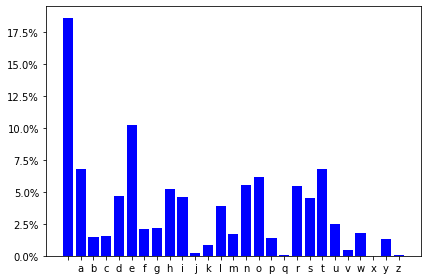

In [30]:

x_counts=Counter(chain.from_iterable(x_file))
x_total=sum(x_counts.values())
x_counts=sorted(x_counts.items())

x_chars, x_data = zip(*x_counts)

plt.bar(x_chars, [i/x_total for i in x_data], color='b')
plt.tight_layout()
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()


A celý výpočet zopakujeme pre Y súbor:

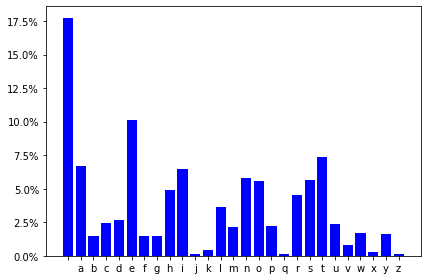

In [31]:
y_counts=Counter(chain.from_iterable(y_file))
y_total=sum(y_counts.values())
y_counts=sorted(y_counts.items())

y_chars, y_data=zip(*y_counts)

plt.bar(y_chars, [i/y_total for i in y_data], color='b')
plt.tight_layout()
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

Na výpočet entropie použijeme funkciu entropy z knihovne scipy. 
Podľa prezentácií z cvičení platí: "Není-li řečeno jinak, uvažujeme základ logaritmu b=2" 
, takže ako parameter "base" funkcie nastavujeme 2.
    

In [32]:
x_entropy=entropy(x_data, base=2)
y_entropy=entropy(y_data, base=2)

print("Entropia X suboru dat: ", x_entropy)
print("Entropia Y suboru dat: ", y_entropy)

Entropia X suboru dat:  4.094689728708523
Entropia Y suboru dat:  4.127313497678557


Na následujúcu úlohu využijeme Huffmanove kódovanie ktoré vytvára optimálny kód, implementácia je rozsiahlejšia tak ju do správy neuvádzam, dá sa skontrolovať na githube, link je v úvode reportu.

In [33]:
from huffman import compute_huffman
x_huffman_code=compute_huffman(x_chars, x_data)
y_huffman_code=compute_huffman(y_chars, y_data)
x_huffman_code = sorted(x_huffman_code)
y_huffman_code = sorted(y_huffman_code)
print("Kód Cx pre X dataset:")
for val, code in x_huffman_code:
    print(val, " -> ", code)

Kód Cx pre X dataset:
   ->  111
a  ->  1011
b  ->  100010
c  ->  100011
d  ->  0010
e  ->  010
f  ->  110101
g  ->  00010
h  ->  0011
i  ->  0000
j  ->  110001101
k  ->  1100010
l  ->  11001
m  ->  110000
n  ->  0111
o  ->  1001
p  ->  100001
q  ->  11000110011
r  ->  0110
s  ->  11011
t  ->  1010
u  ->  00011
v  ->  11000111
w  ->  110100
x  ->  11000110010
y  ->  100000
z  ->  1100011000


Strednú dĺžku kódu spočítame ako sumu súčinov pravdepodobnosti znaku a dĺžky kódu znaku.

In [34]:
x_LC=0
for i in range(len(x_data)):
    x_LC=x_LC+(len(x_huffman_code[i][1])*x_data[i]/x_total)
yx_LC=0
for i in range(len(y_data)):
    yx_LC=yx_LC+(len(x_huffman_code[i][1])*y_data[i]/y_total)
    
y_LC=0
for i in range(len(y_data)):
    y_LC=y_LC+(len(y_huffman_code[i][1])*y_data[i]/y_total)
    
print("Stredná dlžka kodu Cx pre dataset X je: ", x_LC, " entropia X je: ", x_entropy)
print("Stredná dlžka kodu Cx pre dataset Y je: ", yx_LC, " entropia Y je: ", y_entropy)
print("Stredná dlžka kodu Cy pre dataset Y je: ", y_LC, " entropia Y je: ", y_entropy)

Stredná dlžka kodu Cx pre dataset X je:  4.137503871167544  entropia X je:  4.094689728708523
Stredná dlžka kodu Cx pre dataset Y je:  4.21008785216601  entropia Y je:  4.127313497678557
Stredná dlžka kodu Cy pre dataset Y je:  4.163283853377766  entropia Y je:  4.127313497678557


Z nameraných hodnot teda vidíme že kód Cx nieje optimálny pre dataset Y pretože stredná dĺžka kódu Cx pre dataset Y je vačšia ako stredná dĺžka optimálneho kódovania vygenerovaného Huffmanovým kódovaním pre dataset Y.